# Heart Disease Prediction

## Kelompok Bernat tidur 2
#### Rahmat Nur Ibrahim Santosa / 13516009
#### Michelle Eliza Gananjaya / 13516015
#### Erma Safira Nurmasyita / 13516072
#### Daniel Ryan Levyson / 13516132
#### Rinda Nur Hafizha / 13516151

## Dataset Cleaning

In [1]:
# IMPORT DATASET TRAIN AND TEST
import pandas as pd
import numpy as np
dataset = pd.read_csv('data/tubes2_HeartDisease_train.csv')
test_set = pd.read_csv('data/tubes2_HeartDisease_test.csv')

In [2]:
# DATASET ClEANING
# Column Dataset Train
## Column 4 = 46 kosong - numerical
## Column 5 = 24 - numerical
## Column 6 = 78 - categorical
## Column 7 = 1 <- nilainya jadiin 0
## Column 8 = 43 - numerical
## Column 9 = 43 angina - categorical
## Column 10 = 48 ST depression - numerical
## Column 11 = 261 - categorical
## Column 12 = 513 BUANG
## Column 13 = 407 BUANG
import math
dataset = dataset.drop(columns=['Column12', 'Column13'], axis=1)
test_set = test_set.drop(columns=['Column12', 'Column13'])

data_len = len(dataset['Column7'])
for i in range(0, data_len):
    if dataset['Column7'][i] == '?' or math.isnan(float(dataset['Column7'][i])):
        dataset['Column7'][i] = '0'

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
# Hapus row yang ?-nya lebih dari 5
col = 'Column'
for i in range(1, 12):
    column = col + str(i)
    for j in range(0, data_len):
        if dataset[column][j] == '?':
            dataset[column][j] = np.nan

#dataset = dataset.drop(deleterow)

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [4]:
# Replace '?' in categorical data with mode value (Column 6, 9, 11)
mode6 = dataset['Column6'].mode()
mode9 = dataset['Column9'].mode()
mode11 = dataset['Column11'].mode()
for i in range(0, data_len):
    if math.isnan(float(dataset['Column6'][i])):
        dataset['Column6'][i] = mode6
for i in range(0, data_len):
    if math.isnan(float(dataset['Column9'][i])):
        dataset['Column9'][i] = mode9
for i in range(0, data_len):
    if math.isnan(float(dataset['Column11'][i])):
        dataset['Column11'][i] = mode11
        
# Replace '?' in numerical data with median value (Column 4, 5, 8, 10)
median4 = dataset['Column4'].median()
median5 = dataset['Column5'].median()
median8 = dataset['Column8'].median()
median10 = dataset['Column10'].median()
for i in range(0, data_len):
    if math.isnan(float(dataset['Column4'][i])):
        dataset['Column4'][i] = median4
for i in range(0, data_len):
    if math.isnan(float(dataset['Column5'][i])):
        dataset['Column5'][i] = median5
for i in range(0, data_len):
    if math.isnan(float(dataset['Column8'][i])):
        dataset['Column8'][i] = median8
for i in range(0, data_len):
    if math.isnan(float(dataset['Column10'][i])):
        dataset['Column10'][i] = median10

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [5]:
# Dataset yang sudah dibersihin
dataset
#test_set

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column14
0,54,1,4,125,216,0,0,140,0,0,0 2 dtype: object,1
1,55,1,4,158,217,0,0,110,1,2.5,2,1
2,54,0,3,135,304,1,0,170,0,0,1,0
3,48,0,3,120,195,0,0,125,0,0,0 2 dtype: object,0
4,50,1,4,120,0,0,1,156,1,0,1,3
5,64,0,4,130,303,0,0,122,0,2,2,0
6,63,1,4,130,308,0,0,138,1,2,2,2
7,58,1,2,130,251,0,0,110,0,0,0 2 dtype: object,0
8,42,1,2,150,268,0,0,136,0,0,0 2 dtype: object,0
9,54,1,3,120,258,0,2,147,0,4,2,0


In [6]:
from random import choice
import numpy as np
import math

def generate_fold(k, dataset):
    dataset_size = len(dataset)
    fold = [[] for i in range (k)]
    nums = [i for i in range(k)]
    sizes = [0 for i in range(k)]
    normal_size = math.floor(dataset_size / k)
    max_size = math.ceil(dataset_size / k)
    size = max_size
    max_size_counter = dataset_size % k
    
    for val in dataset:
        idx = choice(nums)
        fold[idx].append(val)
        sizes[idx] += 1
        
        if sizes[idx] == size:
            nums.remove(idx)
        
        if sizes[idx] == max_size:
            max_size_counter -= 1
            if max_size_counter == 0:
                size = normal_size
                
                temp = []
                for num in nums:
                    if sizes[num] == size:
                        temp.append(num)
                for t in temp:
                    nums.remove(t)
    return fold

def seperate(dataset):
    params = []
    lables = []
    datasize = len(dataset[0])
    for data in dataset:
        params.append(data[:datasize-1])
        lables.append(data[datasize-1])
    return params, lables

def parse_dataset(frame):
    dataset = []
    for index, row in frame.iterrows():
        dataset.append(row.values.tolist())
    return dataset

def get_trainingset(index, folds):
    training_set = []
    for i in range(len(folds)):
        if i != index:
            for data in folds[i]:
                training_set.append(data)
    return training_set

def pseudo_clean(dataset):
    cleaned = []
    idx = 0
    for data in dataset:
        row = []
        for val in data:
            row.append(float(val))
        cleaned.append(row)
        idx += 1
    return cleaned

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

def train(trainer, folds):
    classifiers = []
    for i in range (len(folds)):
        training_set = get_trainingset(i, folds)
        training_params, training_lables = seperate(training_set)
        classifiers.append(trainer.fit(training_params, training_lables))
    return classifiers

def train_naive_bayes(folds):
    return train(GaussianNB(), folds)

def train_decision_tree(folds):
    return train(tree.DecisionTreeClassifier(), folds)

def train_knn(neighbor, folds):
    return train(KNeighborsClassifier(neighbor), folds)

def train_mlp(folds):
    return train(MLPClassifier(learning_rate_init=0.01, max_iter=300), folds)

In [8]:
dataset = parse_dataset(dataset)
dataset = pseudo_clean(dataset)
folds = generate_fold(10, dataset)

nb_models = train_naive_bayes(folds)
dt_models = train_decision_tree(folds)
knn_models = train_knn(3, folds)
mlp_models = train_mlp(folds)

In [9]:
from sklearn.metrics import accuracy_score

def generate_accuracies(models):
    for i in range(len(models)):
        test_set = folds[i]
        test_params, test_lables = seperate(test_set)
        predictions = models[i].predict(test_params)
        accuracy = accuracy_score(np.array(test_lables), predictions)
        print(str(round(accuracy * 100, 2)) + '%')

In [10]:
print("Naive Bayes Accuracies:")
generate_accuracies(nb_models)
print("Decision Tree Accuracies:")
generate_accuracies(dt_models)
print("K-Nearest Neighbors Accuracies:")
generate_accuracies(knn_models)
print("Multi-Layer Perceptron Accuracies:")
generate_accuracies(mlp_models)

Naive Bayes Accuracies:
53.85%
53.25%
60.26%
58.97%
60.26%
69.23%
61.54%
64.1%
61.54%
46.15%
Decision Tree Accuracies:
100.0%
100.0%
100.0%
100.0%
100.0%
100.0%
100.0%
100.0%
100.0%
38.46%
K-Nearest Neighbors Accuracies:
70.51%
67.53%
62.82%
69.23%
66.67%
58.97%
64.1%
66.67%
64.1%
46.15%
Multi-Layer Perceptron Accuracies:
51.28%
57.14%
44.87%
52.56%
51.28%
52.56%
60.26%
55.13%
47.44%
39.74%


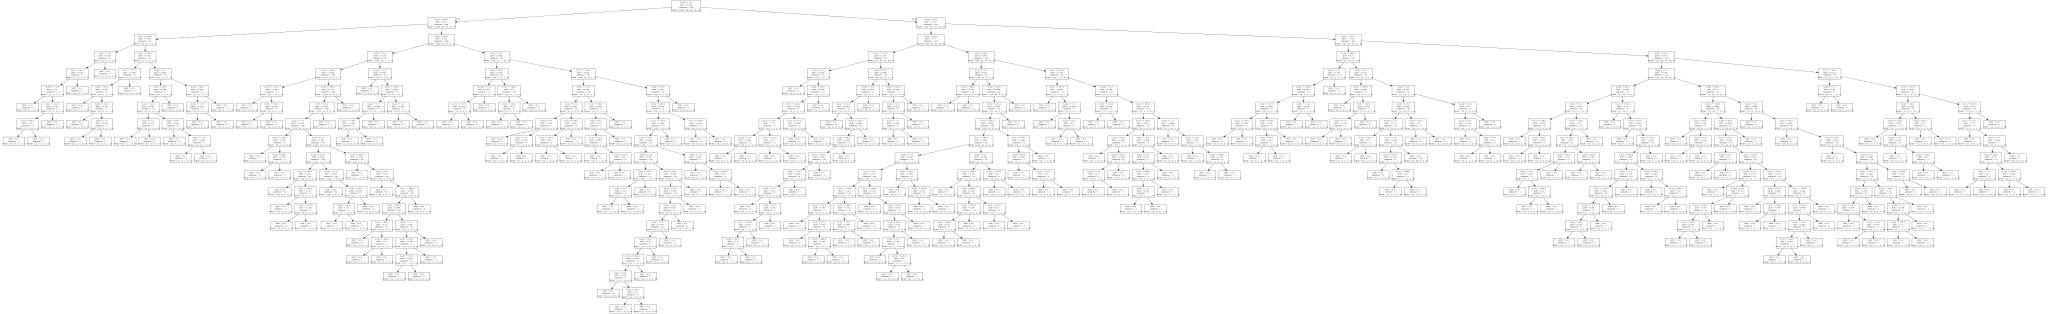

In [11]:
import graphviz 
dot_data = tree.export_graphviz(dt_models[0], out_file=None) 
graph = graphviz.Source(dot_data)  
graph 